In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

data = pd.read_csv('bike_datset_day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
1,2,02-01-2011,1,0.0,1.0,0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670.0,801
2,3,03-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229.0,1349
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0,1562
4,5,05-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1.0,12.0,0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867.0,2114
727,728,28-12-2012,1,1.0,12.0,0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451.0,3095
728,729,29-12-2012,1,1.0,12.0,0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182.0,1341
729,730,30-12-2012,1,1.0,12.0,0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432.0,1796


In [2]:
data.shape

(731, 16)

In [3]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,728.000000,731.000000,729.000000,730.000000,731.000000,729.000000,730.000000,730.000000,731.000000,731.000000,730.000000,731.000000
mean,366.000000,2.496580,0.501370,6.516484,0.028728,2.994513,0.684932,1.395349,0.495111,0.474784,0.628044,0.190486,848.176471,3659.308219,4504.348837
std,211.165812,1.110807,0.500341,3.454519,0.167155,2.006849,0.464862,0.544894,0.183219,0.162657,0.142469,0.077498,686.622488,1559.019285,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336667,0.338045,0.520521,0.134950,315.500000,2502.250000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.487364,0.627083,0.180975,713.000000,3664.500000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.608916,0.730313,0.233214,1096.000000,4783.250000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
data.dtypes


instant         int64
dteday         object
season          int64
yr            float64
mnth          float64
holiday         int64
weekday       float64
workingday    float64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered    float64
cnt             int64
dtype: object

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            1
mnth          3
holiday       0
weekday       2
workingday    1
weathersit    0
temp          2
atemp         1
hum           1
windspeed     0
casual        0
registered    1
cnt           0
dtype: int64

In [6]:
data.eq(0).any()

instant       False
dteday        False
season        False
yr             True
mnth          False
holiday        True
weekday        True
workingday     True
weathersit    False
temp          False
atemp         False
hum            True
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [7]:
zeros= (data== 0).sum()
zeros

instant         0
dteday          0
season          0
yr            364
mnth            0
holiday       710
weekday       105
workingday    230
weathersit      0
temp            0
atemp           0
hum             1
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [8]:
newdt = data

In [9]:
newdt['temp'].fillna(newdt['temp'].mean(),inplace=True)
newdt['atemp'].fillna(newdt['atemp'].mean(),inplace=True)
newdt['hum'].fillna(newdt['hum'].mean(),inplace=True)
newdt['registered'].fillna(newdt['registered'].median(),inplace=True)

In [10]:
newdt['yr']=newdt['yr'].fillna(newdt['yr'].mode()[0])
newdt['mnth']=newdt['mnth'].fillna(newdt['mnth'].mode()[0])

In [11]:
newdt['weekday']=newdt['weekday'].fillna(newdt['weekday'].mode()[0])
newdt['workingday']=newdt['workingday'].fillna(newdt['workingday'].mode()[0])

In [12]:
newdt.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
newdt.mean(numeric_only=True)

instant        366.000000
season           2.496580
yr               0.502052
mnth             6.493844
holiday          0.028728
weekday          2.986320
workingday       0.685363
weathersit       1.395349
temp             0.495111
atemp            0.474784
hum              0.628044
windspeed        0.190486
casual         848.176471
registered    3659.315321
cnt           4504.348837
dtype: float64

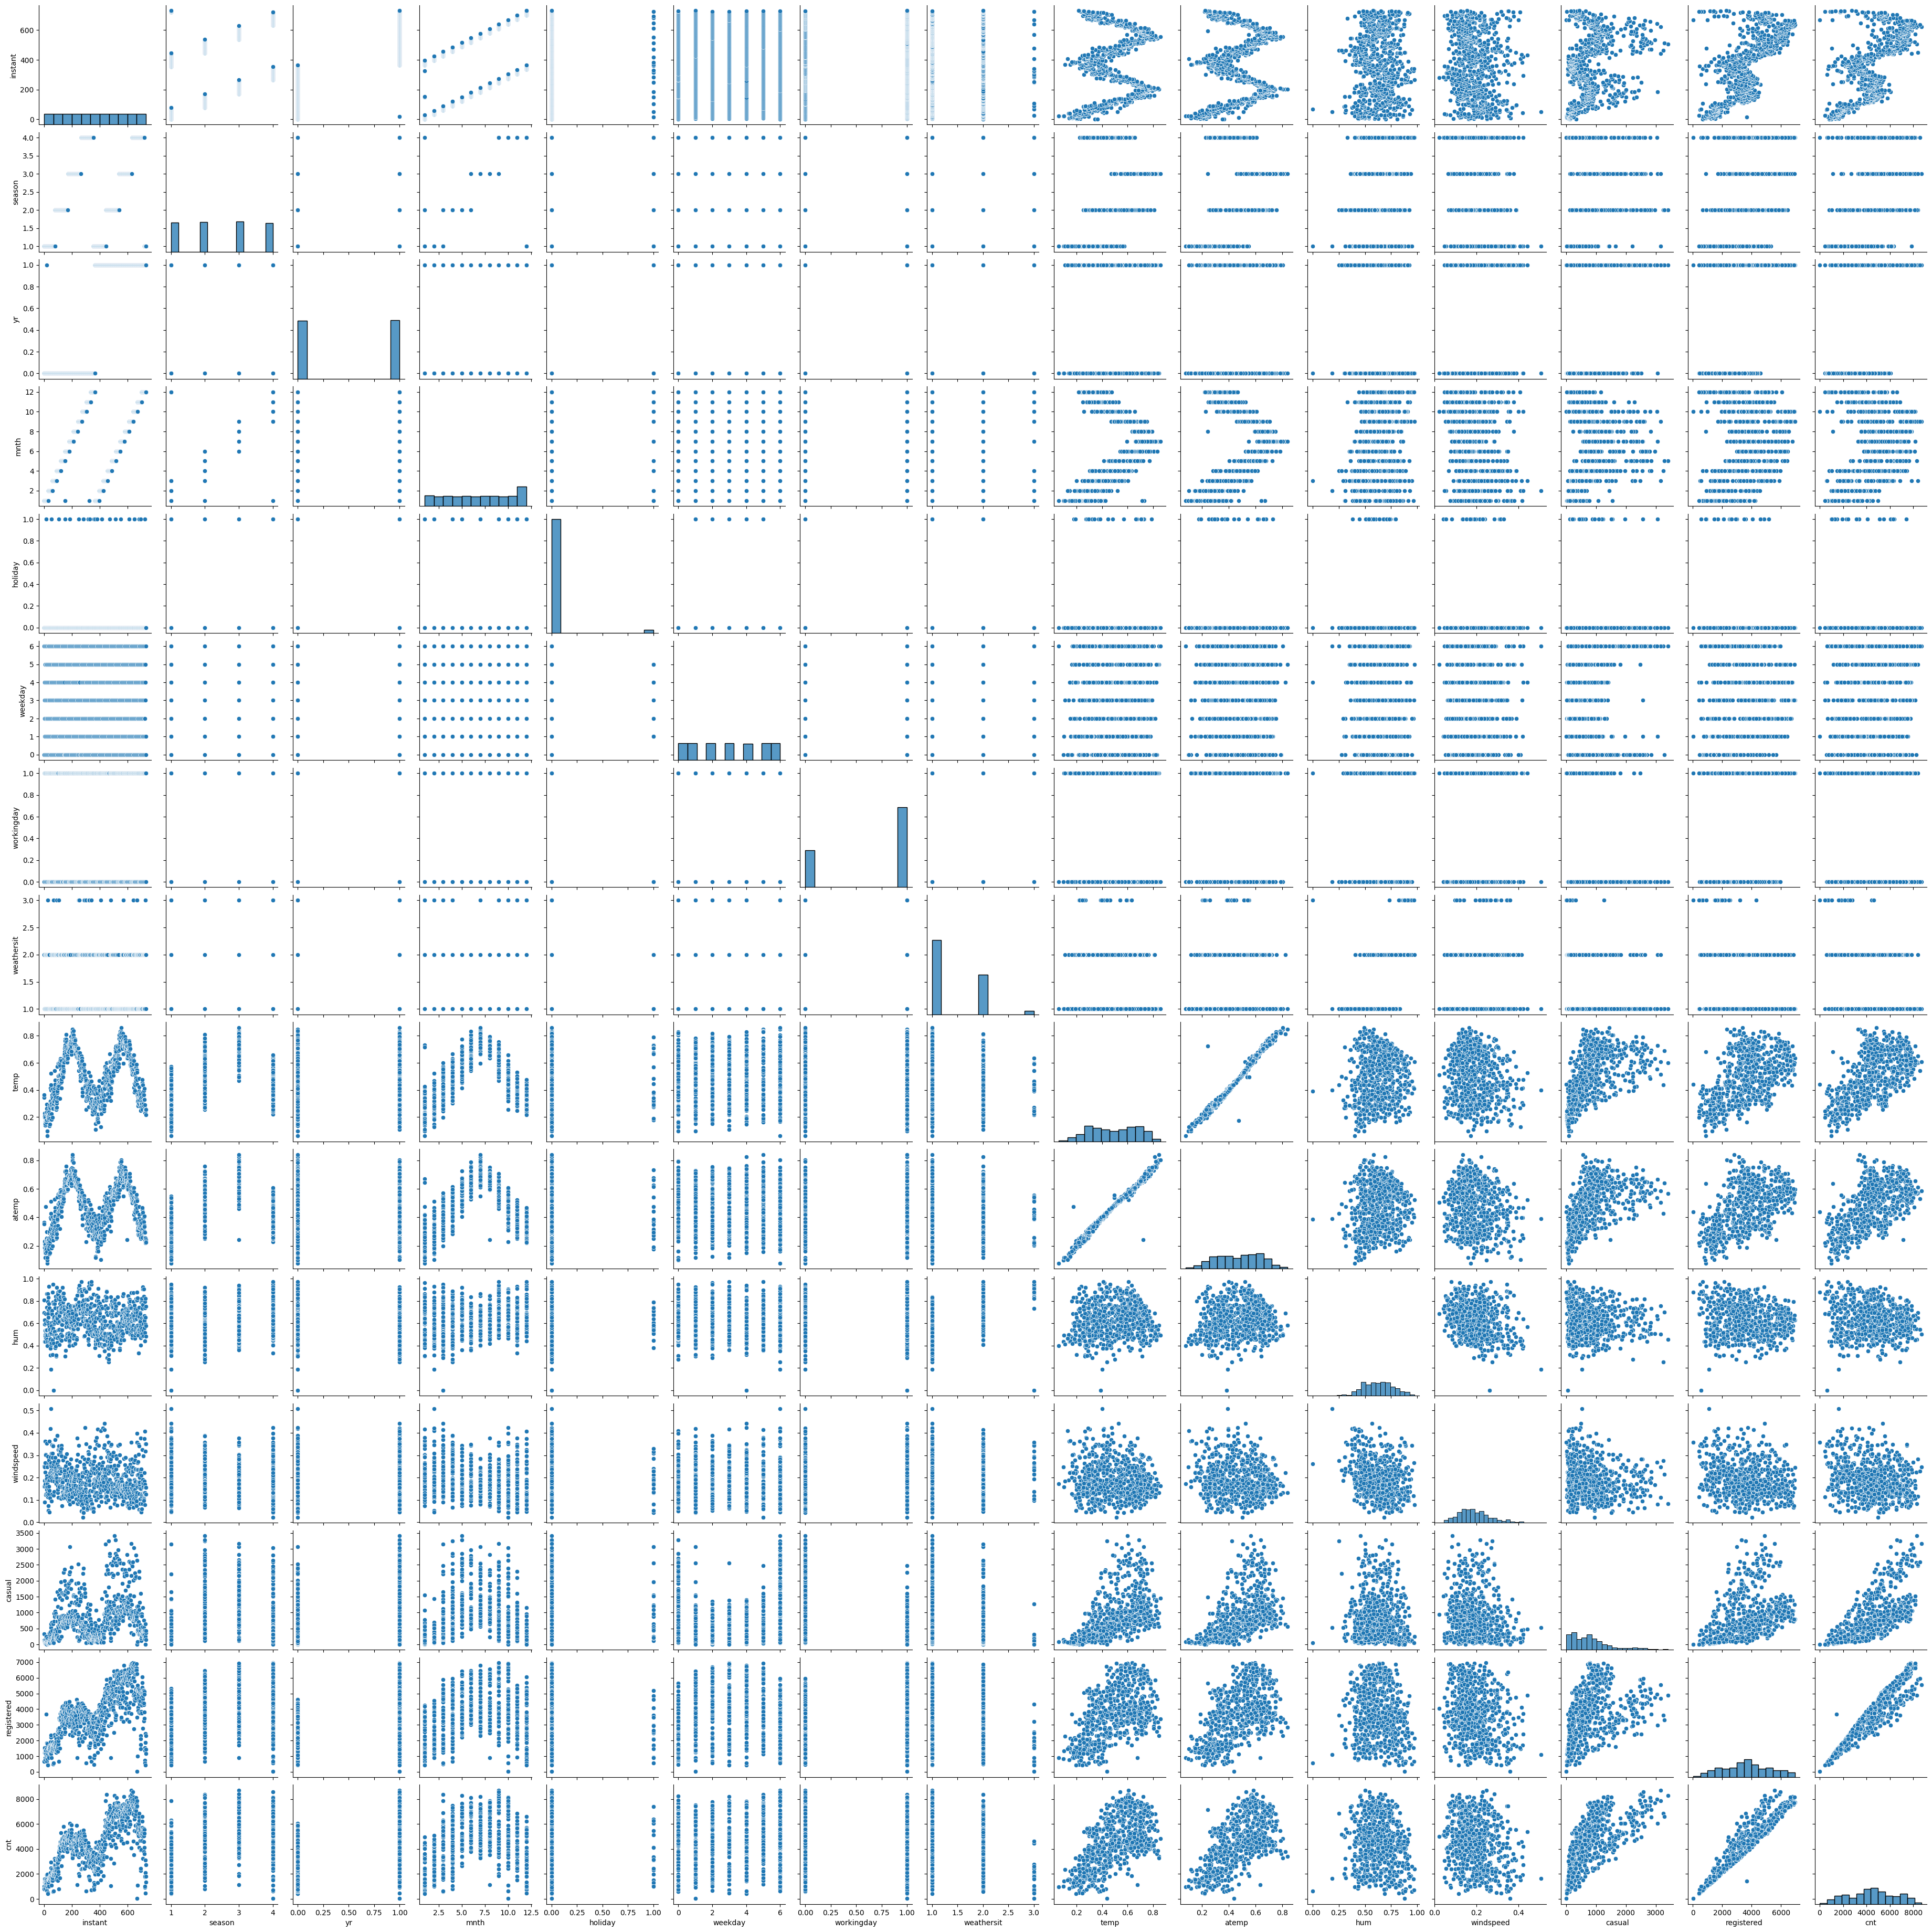

In [14]:
sns.pairplot(newdt)

In [15]:
set1 = newdt.iloc[ :100 , : ]
set1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
1,2,02-01-2011,1,0.0,1.0,0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670.0,801
2,3,03-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229.0,1349
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0,1562
4,5,05-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,06-04-2011,2,0.0,4.0,0,3.0,1.0,1,0.390833,0.387608,0.470833,0.263063,413,2395.0,2808
96,97,07-04-2011,2,0.0,4.0,0,4.0,1.0,1,0.437500,0.433696,0.602917,0.162312,571,2570.0,3141
97,98,08-04-2011,2,0.0,4.0,0,5.0,1.0,2,0.335833,0.324479,0.836250,0.226992,172,1299.0,1471
98,99,09-04-2011,2,0.0,4.0,0,6.0,0.0,2,0.342500,0.341529,0.877500,0.133083,879,1576.0,2455


In [16]:
set2 = newdt[(newdt['mnth'] == 4) & (newdt['holiday'] == 1) ]
set2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
104,105,15-04-2011,2,0.0,4.0,1,5.0,0.0,1,0.446667,0.441913,0.671250,0.226375,642,2484.0,3126
471,472,16-04-2012,2,1.0,4.0,1,1.0,0.0,1,0.664167,0.614925,0.561667,0.284829,1198,5172.0,6370


In [17]:
set3 = newdt[['dteday','temp','hum','registered','cnt']]
set3

,dteday,temp,hum,registered,cnt
0,01-01-2011,0.344167,0.805833,654.0,985
1,02-01-2011,0.363478,0.696087,670.0,801
2,03-01-2011,0.196364,0.437273,1229.0,1349
3,04-01-2011,0.200000,0.590435,1454.0,1562
4,05-01-2011,0.226957,0.436957,1518.0,1600
...,...,...,...,...,...
726,27-12-2012,0.254167,0.652917,1867.0,2114
727,28-12-2012,0.253333,0.590000,2451.0,3095
728,29-12-2012,0.253333,0.752917,1182.0,1341
729,30-12-2012,0.255833,0.483333,1432.0,1796


In [18]:
set4 = newdt[(data['casual'] > 140) & (newdt['registered'] < 1000)]

set4

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
15,16,16-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.231667,0.234217,0.483750,0.188433,251,953.0,1204
22,23,23-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.096522,0.098839,0.436522,0.246600,150,836.0,986
51,52,21-02-2011,1,0.0,2.0,1,1.0,0.0,2,0.303333,0.284075,0.605000,0.307846,195,912.0,1107
238,239,27-08-2011,3,0.0,8.0,0,6.0,0.0,2,0.680000,0.635556,0.850000,0.375617,226,889.0,1115
327,328,24-11-2011,4,0.0,11.0,1,4.0,0.0,1,0.373333,0.372471,0.549167,0.167304,560,935.0,1495
357,358,24-12-2011,1,0.0,12.0,0,6.0,0.0,1,0.302500,0.299242,0.542500,0.190304,155,856.0,1011
358,359,25-12-2011,1,0.0,12.0,0,0.0,0.0,1,0.274783,0.279961,0.681304,0.155091,303,451.0,754
359,360,26-12-2011,1,0.0,12.0,1,1.0,0.0,1,0.321739,0.315535,0.506957,0.239465,430,887.0,1317
723,724,24-12-2012,1,1.0,12.0,0,1.0,1.0,2,0.231304,0.258900,0.791304,0.077230,174,746.0,920


In [19]:
set5 = newdt[(newdt['cnt'] > 981)].iloc[10:150, :]
set5

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13,14,14-01-2011,1,0.0,1.0,0,5.0,1.0,1,0.160870,0.188413,0.537826,0.126548,54,3664.5,1421
14,15,15-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.233333,0.248112,0.498750,0.157963,222,1026.0,1248
15,16,16-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.231667,0.234217,0.483750,0.188433,251,953.0,1204
16,17,17-01-2011,1,0.0,1.0,1,1.0,0.0,2,0.175833,0.176771,0.537500,0.194017,117,883.0,1000
18,19,19-01-2011,1,1.0,1.0,0,3.0,1.0,2,0.292174,0.298422,0.741739,0.208317,78,1572.0,1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,156,05-06-2011,2,0.0,6.0,0,0.0,0.0,2,0.648333,0.616804,0.652500,0.138692,1685,3221.0,4906
156,157,06-06-2011,2,0.0,6.0,0,1.0,1.0,1,0.678333,0.621858,0.600000,0.121896,673,3875.0,4548
157,158,07-06-2011,2,0.0,6.0,0,2.0,1.0,1,0.707500,0.655950,0.597917,0.187808,763,4070.0,4833
158,159,08-06-2011,2,0.0,6.0,0,3.0,1.0,1,0.775833,0.727279,0.622083,0.136817,676,3725.0,4401


In [20]:
x = newdt.drop(columns=['cnt'])
y = newdt['cnt']
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size = 0.25)


In [21]:
x_tr

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
362,363,29-12-2011,1,0.0,12.0,0,4.0,1.0,1,0.248333,0.263892,0.574167,0.119412,254,2169.0
720,721,21-12-2012,1,1.0,12.0,0,5.0,1.0,2,0.326667,0.301767,0.556667,0.374383,221,3402.0
163,164,13-06-2011,2,0.0,6.0,0,1.0,1.0,1,0.635000,0.601654,0.494583,0.305350,863,4157.0
10,11,11-01-2011,1,0.0,1.0,0,2.0,1.0,2,0.169091,0.191464,0.686364,0.122132,43,1220.0
557,558,11-07-2012,3,1.0,7.0,0,3.0,1.0,1,0.716667,0.650271,0.633333,0.151733,975,6289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,343,09-12-2011,4,0.0,12.0,0,5.0,1.0,1,0.290833,0.317542,0.695833,0.082717,261,3359.0
636,637,28-09-2012,4,1.0,9.0,0,5.0,1.0,2,0.619167,0.585863,0.690000,0.164179,1045,6370.0
414,415,19-02-2012,1,1.0,2.0,0,0.0,0.0,2,0.280000,0.265788,0.515833,0.253112,618,2071.0
470,471,15-04-2012,2,1.0,4.0,0,0.0,0.0,1,0.606667,0.573875,0.507917,0.225129,2846,4286.0


In [22]:
x_te

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
378,379,14-01-2012,1,1.0,1.0,0,6.0,0.0,1,0.180000,0.183087,0.457500,0.187183,333,2160.0
574,575,28-07-2012,3,1.0,7.0,0,6.0,0.0,1,0.755833,0.697604,0.613333,0.157350,2234,4451.0
294,295,22-10-2011,4,0.0,10.0,0,6.0,0.0,1,0.422500,0.425492,0.629167,0.092667,1499,2809.0
312,313,09-11-2011,4,0.0,11.0,0,3.0,1.0,1,0.400000,0.409079,0.758333,0.062196,305,3804.0
199,200,19-07-2011,3,0.0,7.0,0,2.0,1.0,1,0.776667,0.747479,0.650417,0.130600,752,3789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,16-02-2011,1,0.0,2.0,0,3.0,1.0,1,0.318261,0.316200,0.423478,0.251791,218,1897.0
156,157,06-06-2011,2,0.0,6.0,0,1.0,1.0,1,0.678333,0.621858,0.600000,0.121896,673,3875.0
443,444,19-03-2012,1,1.0,3.0,0,1.0,1.0,1,0.545000,0.532821,0.728750,0.162317,982,5171.0
153,154,03-06-2011,2,0.0,6.0,0,5.0,1.0,1,0.620000,0.587133,0.354167,0.253121,898,4414.0


In [23]:
y_tr

362    2423
720    3623
163    5020
10     1263
557    7264
       ... 
342    3620
636    7415
414    2689
470    7132
232    3873
Name: cnt, Length: 548, dtype: int64

In [24]:
y_te

378    2493
574    6685
294    4308
312    4109
199    4541
       ... 
46     2115
156    4548
443    6153
153    5312
588    6299
Name: cnt, Length: 183, dtype: int64